Guided Project
---
Winning Jeopardy

**Part 1:** Jeopardy Questions

In [181]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline

jeopardy = pd.read_csv("jeopardy.csv")

print("ORIGINAL JEOPARDY COLUMNS")
print(jeopardy.columns)
jeopardy.columns = ['Show Number','Air Date','Round','Category','Value','Question','Answer']
print('\n')
print("NEW JEOPARDY COLUMNS")
print(jeopardy.columns)

jeopardy.head(5)

ORIGINAL JEOPARDY COLUMNS
Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')


NEW JEOPARDY COLUMNS
Index(['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question',
       'Answer'],
      dtype='object')


,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


**Part 2:** Normalizing Text

In [182]:
import re

def norm_str(string):
    clean_str = string.lower()
    clean_str = re.sub(r'[()?!.,;:"\']','',clean_str)
    str_parts = clean_str.split(' ')
    new_str = []
    for part in str_parts:
        if (part.find('=') == -1) & (part.find('<') == -1) & (part.find('>') == -1):
            new_str.append(part)
    clean_str = ' '.join(new_str)
    return clean_str

jeopardy['clean_question'] = jeopardy['Question'].apply(norm_str)
jeopardy['clean_answer'] = jeopardy['Answer'].apply(norm_str)

jeopardy.head(5)

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was u...,copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisle i...,jim thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show this c...,mcdonalds
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the const...,john adams


**Part 3:** Normalizing Columns

In [183]:
def str_to_int(string):
    clean_str = string.replace('$','')
    try:
        clean_int = int(clean_str)
        return clean_int
    except:
        return 0

jeopardy['clean_value'] = jeopardy['Value'].apply(str_to_int)
jeopardy['Air Date'] = pd.to_datetime(jeopardy['Air Date'])

print("NEW TYPE OF 'AIR DATE'")
print(jeopardy['Air Date'].dtype)
jeopardy.head(5)

NEW TYPE OF 'AIR DATE'
datetime64[ns]


,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_value
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was u...,copernicus,200
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisle i...,jim thorpe,200
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona,200
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show this c...,mcdonalds,200
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the const...,john adams,200


**Part 4:** Answers in Questions

MEAN FRACTION OF WORDS FROM ANSWER IN QUESTION
0.0414640649615


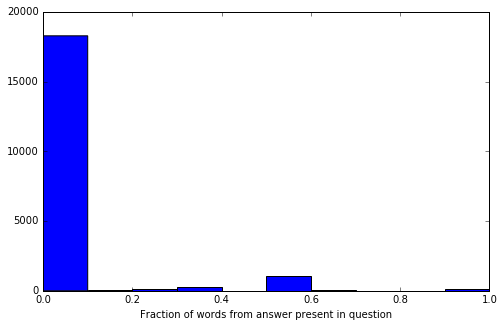

In [184]:
def answer_in_question(row):
    split_answer = row['clean_answer'].split(' ')
    split_question = row['clean_question'].split(' ')
    to_remove = ['the','a','an','of']
    split_answer_sm = []
    split_question_sm = []
    for word in split_answer:
        if word not in to_remove:
            split_answer_sm.append(word)
    for word in split_question:
        if word not in to_remove:
            split_question_sm.append(word)
    if len(split_answer_sm) == 0:
        return 0
    else:
        match_count = 0
        for word in split_answer_sm:
            if word in split_question_sm:
                match_count += 1
        return match_count / len(split_answer_sm)

jeopardy['answer_in_question'] = jeopardy.apply(answer_in_question, axis=1)
mean_ans_in_quest = jeopardy['answer_in_question'].mean()
print("MEAN FRACTION OF WORDS FROM ANSWER IN QUESTION")
print(mean_ans_in_quest)

fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(1,1,1)
ax1.hist(jeopardy['answer_in_question'])
ax1.set_xlabel('Fraction of words from answer present in question')
plt.show()

**Discussion:** Very few questions give clues to the answer by using words that would occur in both.

**Part 5:** Recycled Questions

In [185]:
question_overlap = []
terms_used = set()
term_count = {}
no_match = 0

jeopardy = jeopardy.sort_values('Air Date')

for i,row in jeopardy.iterrows():
    split_question = row['clean_question'].split(' ')
    split_question_lg = []
    for word_o in split_question:
        if len(word_o) >= 6:
            split_question_lg.append(word_o)
    match_count = 0
    if len(split_question_lg) > 0:
        for word_l in split_question_lg:
            if word_l in terms_used:
                match_count += 1
                term_count[word_l] += 1
            else:
                terms_used.add(word_l)
                term_count[word_l] = 1
        match_count = match_count / len(split_question_lg)
    question_overlap.append(match_count)
    if match_count == 0:
        no_match += 1

jeopardy['question_overlap'] = question_overlap
mean_overlap = jeopardy['question_overlap'].mean()
print("AVERAGE FRACTION OF TERMS IN EACH QUESTION USED PREVIOUSLY")
print(mean_overlap)
print('\n')
print("PERCENTAGE OF QUESTIONS THAT HAD NO TERMS USED PREVIOUSLY")
print(no_match / jeopardy.shape[0])

AVERAGE FRACTION OF TERMS IN EACH QUESTION USED PREVIOUSLY
0.694261033031


PERCENTAGE OF QUESTIONS THAT HAD NO TERMS USED PREVIOUSLY
0.08140407020351018


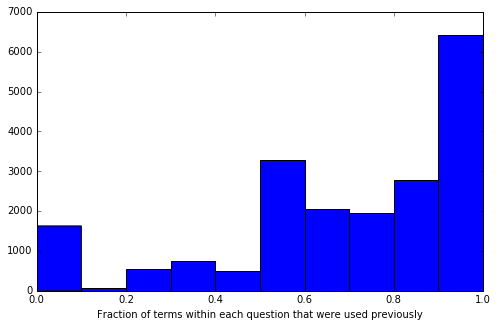

In [186]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.hist(jeopardy['question_overlap'])
ax.set_xlabel('Fraction of terms within each question that were used previously')
plt.show()

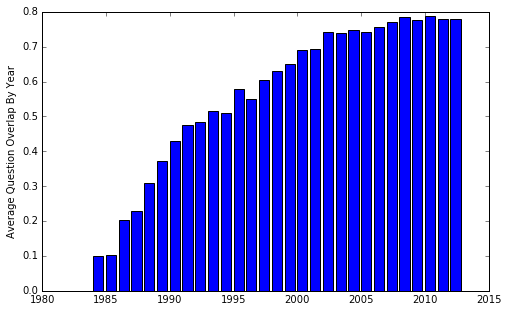

In [187]:
dates = list(jeopardy['Air Date'])
years = [t.to_datetime().year for t in dates]
jeopardy = jeopardy.assign(year = years)
jeop_by_year = jeopardy.groupby('year').mean()

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.bar(jeop_by_year.index, jeop_by_year['question_overlap'])
ax.set_ylabel("Average Question Overlap By Year")
plt.show()

MAXIMUM NUMBER OF TIMES A TERM OCCURS IN QUESTIONS
521


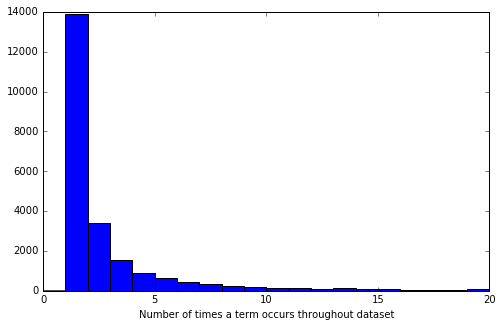

In [188]:
frequencies = list(term_count.values())
max_f = max(frequencies)
print("MAXIMUM NUMBER OF TIMES A TERM OCCURS IN QUESTIONS")
print(max_f)

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.hist(frequencies, bins=20, range=(0,20), align='mid')
ax.set_xlim([0,20])
ax.set_xlabel('Number of times a term occurs throughout dataset')
plt.show()

**Discussion:** It appears that terms from individual questions are increasingly recycled as time goes by. Early on in the show's history, most questions were unique. Now, most questions have terms that have been used at least once before. It's also worth noting that the vast majority of terms in questions only appear once (last plot). However, in the vast majority of questions, more than half of the terms present have been used previously (first two plots). In order for both of these things to be true, questions need to have multiple terms and some terms must be appearing over and over. So, questions might look like:
1. Term A is part of Term B
2. Term C lived near Term A
3. Term D was once kind of Term A

Terms B, C, and D each occur only once, but Term A occurs in each question. Therefore, each question would have 50% recycled content.

**Part 6:** Low Value vs High Value Questions

In [189]:
def val_thresh(row):
    if row['clean_value'] > 800:
        return 1
    else:
        return 0

jeopardy['high_value'] = jeopardy.apply(val_thresh, axis=1)

def count_high_low(word):
    low_count = 0
    high_count = 0
    for i,row in jeopardy.iterrows():
        split_clean = row['clean_question'].split(' ')
        if word in split_clean:
            if row['high_value'] == 1:
                high_count += 1
            else:
                low_count += 1
    return high_count, low_count

observed_expected = []
comparison_terms = list(terms_used)[0:5]

for term in comparison_terms:
    results = count_high_low(term)
    observed_expected.append(results)
    print('term: {0}, high_count: {1}, low_count: {2}'.format(term, results[0], results[1]))

term: classifies, high_count: 0, low_count: 1
term: smells, high_count: 2, low_count: 0
term: obtained, high_count: 1, low_count: 5
term: versailles, high_count: 0, low_count: 4
term: noltes, high_count: 0, low_count: 1


**Part 7:** Applying the Chi-Squared Test

In [190]:
from scipy.stats import chisquare

tot_count = jeopardy.shape[0]
high_value_count = sum(list(jeopardy['high_value']))
low_value_count = tot_count - high_value_count

chi_squared = []
p_val = []
for pair in observed_expected:
    total = pair[0] + pair[1]
    total_prop = total / tot_count
    expected_high = total_prop * high_value_count
    expected_low = total_prop * low_value_count
    chisq, p = chisquare(pair, [expected_high, expected_low])
    chi_squared.append(chisq)
    p_val.append(p)
    
for i in range(len(chi_squared)):
    print('term: {0}, chisq: {1:.2f}, p: {2:.2f}'.format(comparison_terms[i], chi_squared[i], p_val[i]))

term: classifies, chisq: 0.33, p: 0.57
term: smells, chisq: 6.04, p: 0.01
term: obtained, chisq: 0.22, p: 0.64
term: versailles, chisq: 1.32, p: 0.25
term: noltes, chisq: 0.33, p: 0.57


**Discussion:** The instructions for this portion of the project were to select the first 5 terms in the 'terms_used' set. Unfortunately, as you can see in the numbers from the last section, those 5 terms didn't occur very often in the dataset. In fact, most terms don't occur very often. Only a small number occur over and over. Because of that, the chi-squared values reported above don't mean anything. The sample sizes are too small.

**Part 8:** Next Steps

Suggestions for additional work include looking for better methods to identify 'meaningful' terms in questions and answers, performing the chi-squared analyses on more terms (hopefully with larger counts), and looking for trends using 'Category' as a discriminator.

For now, though, I'm going to park this exercise.